## PROJET QUOTES

1. Définir le web scraping et les cas d’usage
2. Quels sont les étapes du web scraping ?
3. Faire une cartographie du site à analyser comme dans l’exemple suivant
4.  a. Identifier les données à récupérer
    b. Identifier les balises html
    c. Faire une table de correspondance avec les éléments précédents
5. Ecrire un script python pour récupérer l’ensemble des données de la page
    a. D’abord une page de description détaillée de votre solution
    b. Le script python qui implémente votre solution
6. Que peut-on faire avec les données récupérées en termes d’analyse ? Proposez des cas d’études

### 1. Definition du web scrapping

Le terme de web scraping désigne sur un plan général une technique d'extraction automatique de contenus qui sont le plus souvent structurés, sur un ou plusieurs sites web effectuée par un tiers à l'aide programmes, bots, ou scripts spécifiques.

Le scraping, web scraping ou encore harvesting, a plusieurs utilités. Il permet d'abord de réutiliser des contenus présents sur un site web pour l'afficher sur un autre site web, et ainsi multiplier sans effort le nombre de pages disposant d'un même contenu. 
Cette technique, assimilée à du pillage ou pompage de contenu, participe à un meilleur référencement d'un site web, sauf lorsqu'elle est détectée par les algorithmes des moteurs de recherche (qui la sanctionnent sévèrement). Le scraping peut également être utilisé comme un outil de surveillance des concurrents (on récupère automatiquement les tarifs pratiqués par un site de commerce en ligne concurrent et l'on détecte leurs variations) ou comme outil de veille concurrentielle.

##### Légalité
- Aux États-Unis
Aux États-Unis, la société hiQ Labs utilise le web scraping sur les données de LinkedIn à des fins de recrutement. À la suite d'un procès, la Cour d'appel des États-Unis pour le neuvième circuit donne raison à hiQ en septembre 2019 : la cour considère notamment que les utilisateurs conservent la propriété de leurs profils, et que les données étant librement diffusées sur Internet, elles peuvent être collectées2. L'affaire est ensuite portée devant la Cour suprême3.


- En Europe
Dans un jugement de 2013, la cour de justice de l'Union européenne a condamné le métamoteur de recherche Innoweb, qui réutilisait les données de l'entreprise de vente d'automobiles Wegener sans aucune modification de celles-ci4.
Le 30 avril 2020, la CNIL a publié de nouvelles directives sur le web scraping5. Les lignes directrices de la CNIL précisent que les données accessibles au public sont toujours des données personnelles et qu'elles ne peuvent pas être réutilisées à l'insu de la personne à laquelle ces données appartiennent

### 2. Etape du web scrapping

Le scraping ou crawling se fait en deux étapes : le téléchargement du code HTML de la page à scraper, et son parsing.

Pour obtenir le contenu de la page web (téléchargement) il suffit de faire une requête et HTTP et d’attendre le réponse. 
Il faut importer la bibliothèque <strong>requests</strong> de Python, celle-ci nous permettra de télécharger tout le contenu du site.
<ul>
    <li style="font-weight: bold">import requests</li>
</ul>

Ensuite il faut importer la bibliothèque <strong>bs4</strong>. Elle n'est pas installer par défaut sur l'ordinateur en générale, pour l'installer, il suffit de faire le script suivant dans l'<strong>invite de commande</strong> :
<ul>
    <li style="font-weight: bold">pip install bs4</li>
    <li>apres installation importer la bibliothèque dans votre projet avec la commande</li>
    <li style="font-weight: bold">from bs4 import beautifulSoup</li>
</ul>
L'importation de la bibliothèque <strong>bs4</strong> nous permettra de recuperer differente information sur le contenu du site web.

Une étape clé est de savoir les informations que l'on souhaitent scrapper et de reperer les balises(div, p, ...) les contenant. On peut avoir les balises souhaitées en faisant un clic droit, puis sur cliquer sur "inspecter l'élémenté".

Grace <strong>beautifulSoup</strong> et ses methodes de selection (find, findAll, select), on pourra recupérer les informations recherchées. 
L'idée est scrapper une page et de faire la même opération sur les différentes pages du site entier.

### 3. Cartographie

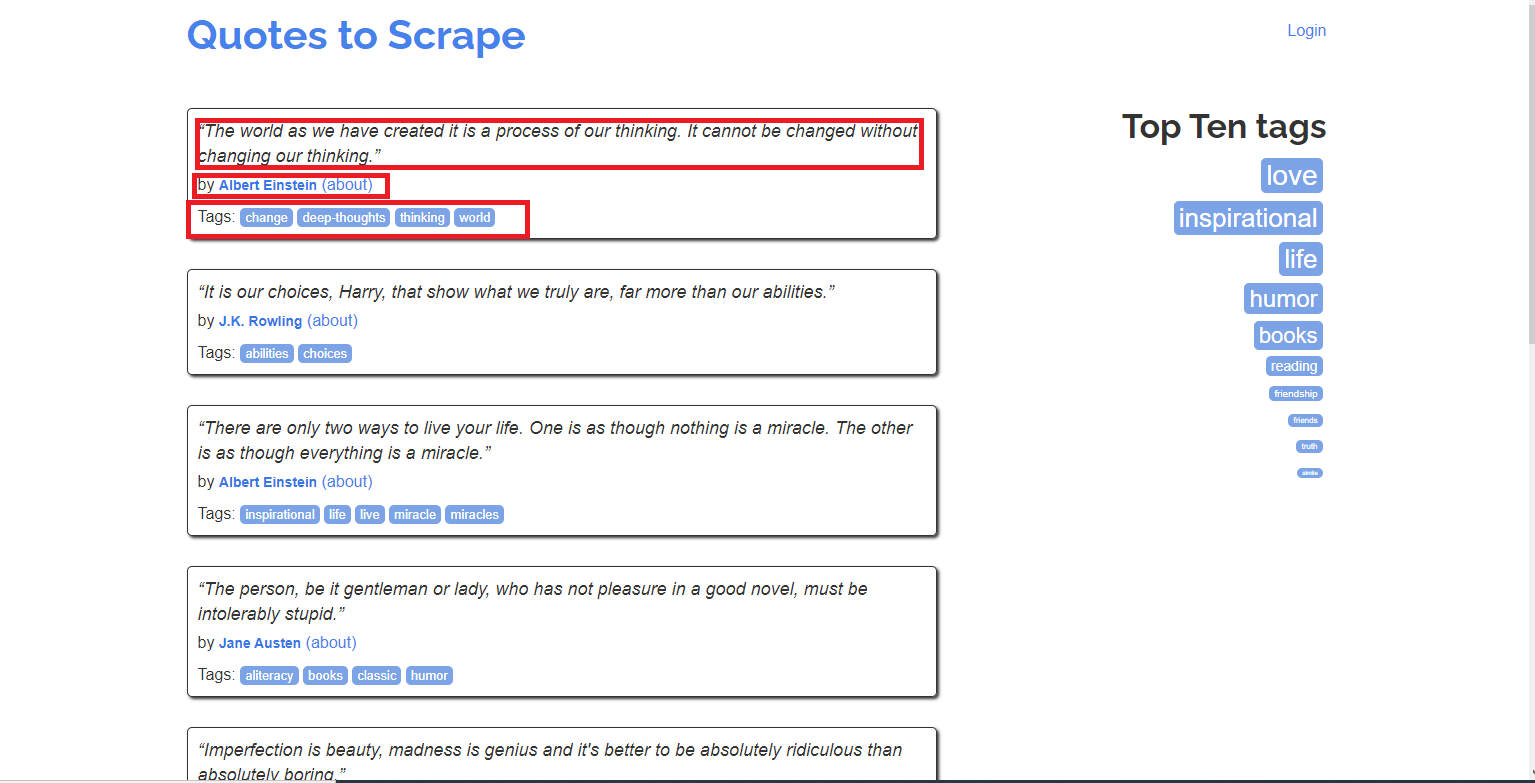

In [168]:
from IPython.display import Image
Image("quote2.PNG")

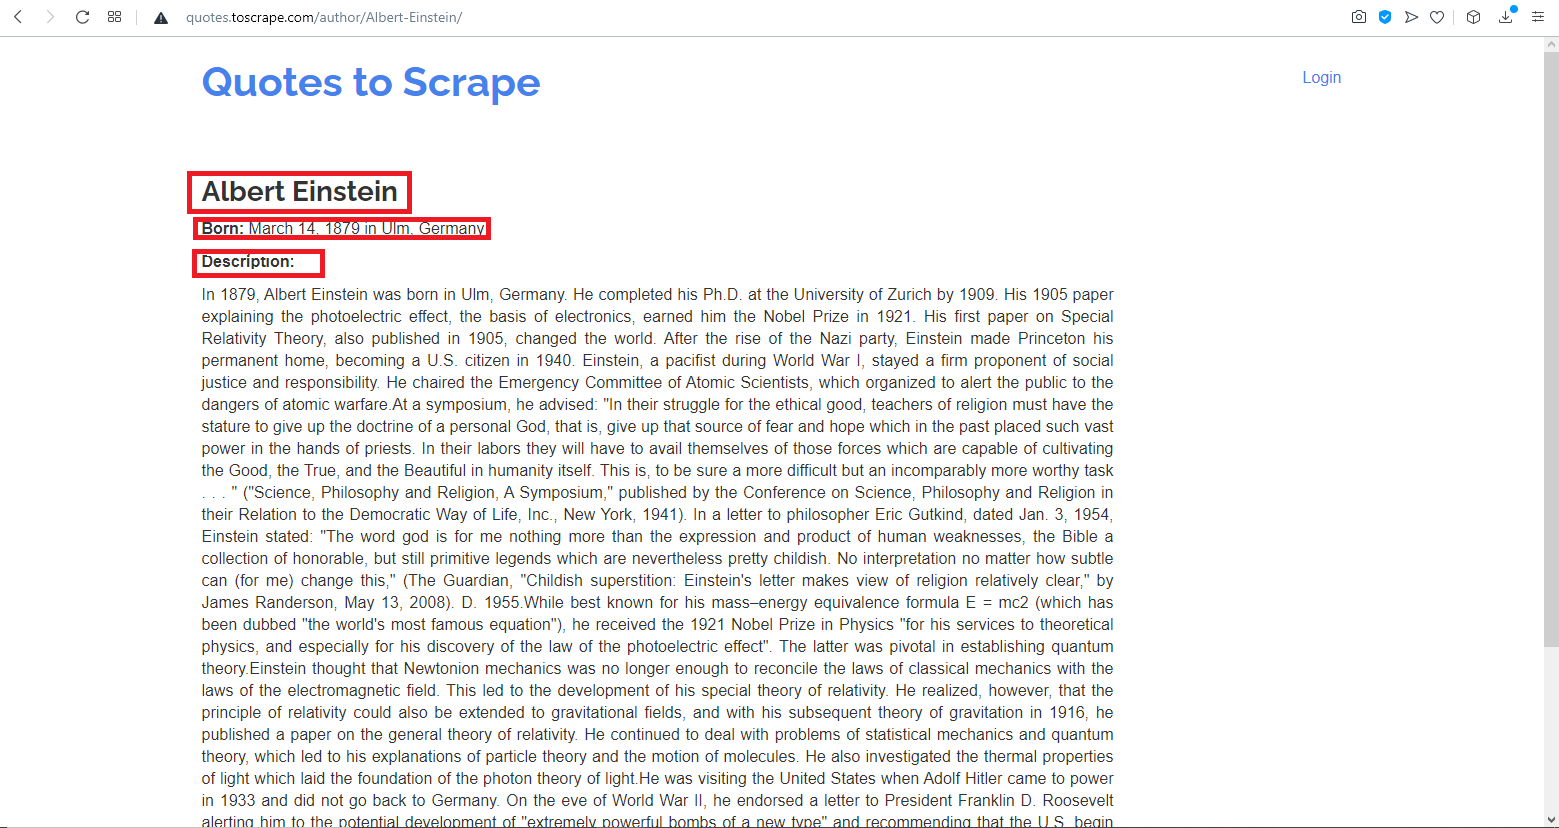

In [169]:
Image("quote1.PNG")

### 4. 
    a. Identification des données (voir cartographie)
    b. Identification des balises pour la premiere page
<ul>
<li>div class="quote": pour cibler le block d'information de chaques auteurs</li>
<li>div class="tags": pour recuperer les tags</li>
<li>span a href="lien vers auteur": nous permettra d'accèder à la page de description complète de l'auteur</li>
</ul>
    
Pour la deuxieme page
<ul>
<li>div class="author-details"</li>
<li>h3 class="author-title" : Nom de l'auteur</li>
<li>span class="author-born-date" : Date de naissance</li>
<li>span class="author-born-location": Lieu de naissance</li>
</ul>    

c. Table de correspondance des éléments

#### Page principal
<table style="float:left">
    <th>Données</th>
    <th>HTML</th>
    <tr>
        <td style="border: 1px solid black; ">Auteur</td>
        <td style="border: 1px solid black; ">small class="author"</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; ">Text (Citation)</td>
        <td style="border: 1px solid black; ">span class="text"</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; ">Tags</td>
        <td style="border: 1px solid black; ">div class="tags"</td>
    </tr>
</table>

#### Page descriptive de l'auteur
<table style="float:left">
    <th>Données</th>
    <th>HTML</th>
    <tr>
        <td style="border: 1px solid black; ">Nom de l'auteur</td>
        <td style="border: 1px solid black; ">h3 class="author-title"</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; ">Date de naissance</td>
        <td style="border: 1px solid black; ">span class="author-born-date"</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; ">Lieu de naissance</td>
        <td style="border: 1px solid black; ">span class="author-born-location"</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; ">description</td>
        <td style="border: 1px solid black; ">span class="author-description"</td>
    </tr>
</table>

### 5. Ecriture du script python

In [170]:
# recuperation des tags de la page principale

import requests
from bs4 import BeautifulSoup
import copy


requests_test = requests.get('http://quotes.toscrape.com')
soup_test = BeautifulSoup(requests_test.content)
soup_test

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="row">
<div class="col-md-8">
<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="t

<strong>Ici nous allons tenter de recupérer les informations de la premère citation.</strong>

In [171]:
auteur = soup_test.find("small", "author")
citation = soup_test.find('span', 'text')
tags_test = soup_test.find("div", "tags")
list_citation_info = [auteur, citation, tags_test]
infos_test = {}

def content_values(row):
    """
        *return : retourne de le contenu de la balise
    """
    value = []
    if(item < 2):
        return row.get_text(" ", strip=True).replace("\n", "")
    else:
        for a in row.findAll('a'):
            value.append(a.get_text())
        return value
        
for item, row in enumerate(list_citation_info):
    # key retourne la valeur de l'attribut (class, id, etc...)
    key = (str(row['class'])).replace("['", "").replace("']", "")
    value =  content_values(row)
    infos_test[key] = value
infos_test

{'author': 'Albert Einstein',
 'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 'tags': ['change', 'deep-thoughts', 'thinking', 'world']}

In [3]:
## recuperation des tags des 10 pages

import requests
from bs4 import BeautifulSoup
import copy

url_page = []
infos = {}
list_infos = []

def getUrlPage():
    page = 1
    while page < 11:
        url_page.append(f'http://quotes.toscrape.com/page/{page}/')
        page += 1
    return url_page
getUrlPage()

for url in url_page:
    requests_test = requests.get(url)
    soup_test = BeautifulSoup(requests_test.content)
    
    auteurs = soup_test.findAll("small", "author")
    citations = soup_test.findAll('span', 'text')
    tags = soup_test.findAll("div", "tags")
    
    for index in range(10):
        list_citation_infos = [auteurs[index], citations[index], tags[index]]
        for item, row in enumerate(list_citation_infos):
            key = (str(row['class'])).replace("['", "").replace("']", "")
            value =  content_values(row)
            infos[key] = value
        list_infos.append(copy.deepcopy(infos))

def content_values(row):
    value = []
    if(item < 2):
        return row.get_text(" ", strip=True).replace("\n", "")
    else:
        for a in row.findAll('a'):
            value.append(a.get_text())
        return str(", ".join(value))
        
list_infos

[{'author': 'Albert Einstein',
  'text': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
  'tags': 'Tags: change deep-thoughts thinking world'},
 {'author': 'J.K. Rowling',
  'text': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
  'tags': 'Tags: abilities choices'},
 {'author': 'Albert Einstein',
  'text': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
  'tags': 'Tags: inspirational life live miracle miracles'},
 {'author': 'Jane Austen',
  'text': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
  'tags': 'Tags: aliteracy books classic humor'},
 {'author': 'Marilyn Monroe',
  'text': "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”",
  'tags': 'Tags: be-yourself ins

In [4]:
import pandas as pd

citation_data = pd.DataFrame(list_infos)
citation_data.head()

,author,text,tags
0,Albert Einstein,“The world as we have created it is a process ...,Tags: change deep-thoughts thinking world
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...",Tags: abilities choices
2,Albert Einstein,“There are only two ways to live your life. On...,Tags: inspirational life live miracle miracles
3,Jane Austen,"“The person, be it gentleman or lady, who has ...",Tags: aliteracy books classic humor
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...",Tags: be-yourself inspirational


In [5]:
# recuperation des infos sur une page d'auteur
import requests
from bs4 import BeautifulSoup
import copy

requests = requests.get('http://quotes.toscrape.com/author/Albert-Einstein/')
soup = BeautifulSoup(requests.content)
soup

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Quotes to Scrape</title>
<link href="/static/bootstrap.min.css" rel="stylesheet"/>
<link href="/static/main.css" rel="stylesheet"/>
</head>
<body>
<div class="container">
<div class="row header-box">
<div class="col-md-8">
<h1>
<a href="/" style="text-decoration: none">Quotes to Scrape</a>
</h1>
</div>
<div class="col-md-4">
<p>
<a href="/login">Login</a>
</p>
</div>
</div>
<div class="author-details">
<h3 class="author-title">Albert Einstein
    </h3><p><strong>Born:</strong> <span class="author-born-date">March 14, 1879</span> <span class="author-born-location">in Ulm, Germany</span></p>
<p><strong>Description:</strong></p>
<div class="author-description">
        In 1879, Albert Einstein was born in Ulm, Germany. He completed his Ph.D. at the University of Zurich by 1909. His 1905 paper explaining the photoelectric effect, the basis of electronics, earned him the Nobel Prize in 1921. His first paper on Special Re

In [6]:
auteur_infos = soup.find("div", "author-details")
auteur_infos

<div class="author-details">
<h3 class="author-title">Albert Einstein
    </h3><p><strong>Born:</strong> <span class="author-born-date">March 14, 1879</span> <span class="author-born-location">in Ulm, Germany</span></p>
<p><strong>Description:</strong></p>
<div class="author-description">
        In 1879, Albert Einstein was born in Ulm, Germany. He completed his Ph.D. at the University of Zurich by 1909. His 1905 paper explaining the photoelectric effect, the basis of electronics, earned him the Nobel Prize in 1921. His first paper on Special Relativity Theory, also published in 1905, changed the world. After the rise of the Nazi party, Einstein made Princeton his permanent home, becoming a U.S. citizen in 1940. Einstein, a pacifist during World War I, stayed a firm proponent of social justice and responsibility. He chaired the Emergency Committee of Atomic Scientists, which organized to alert the public to the dangers of atomic warfare.At a symposium, he advised: "In their struggle f

In [7]:
nom_auteur = auteur_infos.find('h3')
author_born_date = auteur_infos.find('span', 'author-born-date')
author_born_location = auteur_infos.find('span', 'author-born-location')
author_born_description = auteur_infos.find('div', 'author-description')
list_auteur_info = [nom_auteur, author_born_date, author_born_location, author_born_description]
dict_auteur_info = {}

def content_values(row):
    return row.get_text(" ", strip=True).replace("\n", "")
    
for row in list_auteur_info:
    key = (str(row['class'])).replace("['", "").replace("']", "")
    value =  content_values(row)
    dict_auteur_info[key] = value
dict_auteur_info

{'author-title': 'Albert Einstein',
 'author-born-date': 'March 14, 1879',
 'author-born-location': 'in Ulm, Germany',
 'author-description': 'In 1879, Albert Einstein was born in Ulm, Germany. He completed his Ph.D. at the University of Zurich by 1909. His 1905 paper explaining the photoelectric effect, the basis of electronics, earned him the Nobel Prize in 1921. His first paper on Special Relativity Theory, also published in 1905, changed the world. After the rise of the Nazi party, Einstein made Princeton his permanent home, becoming a U.S. citizen in 1940. Einstein, a pacifist during World War I, stayed a firm proponent of social justice and responsibility. He chaired the Emergency Committee of Atomic Scientists, which organized to alert the public to the dangers of atomic warfare.At a symposium, he advised: "In their struggle for the ethical good, teachers of religion must have the stature to give up the doctrine of a personal God, that is, give up that source of fear and hope wh

In [8]:
full_url = []
def getFullUrl(url):
    import requests
    from bs4 import BeautifulSoup
    request = requests.get(url)
    soup = BeautifulSoup(request.content)
    small = soup.find_all("small", "author")
    first_url = "http://quotes.toscrape.com/author/"
    for row in small:
        full_url.append(first_url + row.get_text().replace(' ', '-').replace('.', '-').replace('--', '-').replace('Jr-', 'Jr'))
    return full_url

In [9]:
for url in url_page:
    getFullUrl(url)
full_url

['http://quotes.toscrape.com/author/Albert-Einstein',
 'http://quotes.toscrape.com/author/J-K-Rowling',
 'http://quotes.toscrape.com/author/Albert-Einstein',
 'http://quotes.toscrape.com/author/Jane-Austen',
 'http://quotes.toscrape.com/author/Marilyn-Monroe',
 'http://quotes.toscrape.com/author/Albert-Einstein',
 'http://quotes.toscrape.com/author/André-Gide',
 'http://quotes.toscrape.com/author/Thomas-A-Edison',
 'http://quotes.toscrape.com/author/Eleanor-Roosevelt',
 'http://quotes.toscrape.com/author/Steve-Martin',
 'http://quotes.toscrape.com/author/Marilyn-Monroe',
 'http://quotes.toscrape.com/author/J-K-Rowling',
 'http://quotes.toscrape.com/author/Albert-Einstein',
 'http://quotes.toscrape.com/author/Bob-Marley',
 'http://quotes.toscrape.com/author/Dr-Seuss',
 'http://quotes.toscrape.com/author/Douglas-Adams',
 'http://quotes.toscrape.com/author/Elie-Wiesel',
 'http://quotes.toscrape.com/author/Friedrich-Nietzsche',
 'http://quotes.toscrape.com/author/Mark-Twain',
 'http://quot

## Dans l'étude de la page descriptive, nous avons décidé de rétiré les doublons d'url car les informations d'un auteur sont identiques.

In [10]:
full_url_sans_doublon = []
for lien in full_url:
    if lien not in full_url_sans_doublon:
        full_url_sans_doublon.append(lien)
full_url_sans_doublon

['http://quotes.toscrape.com/author/Albert-Einstein',
 'http://quotes.toscrape.com/author/J-K-Rowling',
 'http://quotes.toscrape.com/author/Jane-Austen',
 'http://quotes.toscrape.com/author/Marilyn-Monroe',
 'http://quotes.toscrape.com/author/André-Gide',
 'http://quotes.toscrape.com/author/Thomas-A-Edison',
 'http://quotes.toscrape.com/author/Eleanor-Roosevelt',
 'http://quotes.toscrape.com/author/Steve-Martin',
 'http://quotes.toscrape.com/author/Bob-Marley',
 'http://quotes.toscrape.com/author/Dr-Seuss',
 'http://quotes.toscrape.com/author/Douglas-Adams',
 'http://quotes.toscrape.com/author/Elie-Wiesel',
 'http://quotes.toscrape.com/author/Friedrich-Nietzsche',
 'http://quotes.toscrape.com/author/Mark-Twain',
 'http://quotes.toscrape.com/author/Allen-Saunders',
 'http://quotes.toscrape.com/author/Pablo-Neruda',
 'http://quotes.toscrape.com/author/Ralph-Waldo-Emerson',
 'http://quotes.toscrape.com/author/Mother-Teresa',
 'http://quotes.toscrape.com/author/Garrison-Keillor',
 'http://

In [11]:
auteur_infos_list = []

def content_values(row):
        return row.get_text(" ", strip=True).replace("\n", "")
    
for url in full_url_sans_doublon:
    import requests
    from bs4 import BeautifulSoup
    import copy
    requests = requests.get(url)
    soup = BeautifulSoup(requests.content)
    auteur_infos = soup.find("div", "author-details")

    nom_auteur = auteur_infos.find('h3')
    author_born_date = auteur_infos.find('span', 'author-born-date')
    author_born_location = auteur_infos.find('span', 'author-born-location')
    author_born_description = auteur_infos.find('div', 'author-description')
    list_auteur_info = [nom_auteur, author_born_date, author_born_location, author_born_description]
    dict_auteur_info = {}
    
    for row in list_auteur_info:
        key = (str(row['class'])).replace("['", "").replace("']", "")
        value =  content_values(row)
        dict_auteur_info[key] = value
    auteur_infos_list.append(copy.deepcopy(dict_auteur_info))

In [12]:
auteur_infos_list

[{'author-title': 'Albert Einstein',
  'author-born-date': 'March 14, 1879',
  'author-born-location': 'in Ulm, Germany',
  'author-description': 'In 1879, Albert Einstein was born in Ulm, Germany. He completed his Ph.D. at the University of Zurich by 1909. His 1905 paper explaining the photoelectric effect, the basis of electronics, earned him the Nobel Prize in 1921. His first paper on Special Relativity Theory, also published in 1905, changed the world. After the rise of the Nazi party, Einstein made Princeton his permanent home, becoming a U.S. citizen in 1940. Einstein, a pacifist during World War I, stayed a firm proponent of social justice and responsibility. He chaired the Emergency Committee of Atomic Scientists, which organized to alert the public to the dangers of atomic warfare.At a symposium, he advised: "In their struggle for the ethical good, teachers of religion must have the stature to give up the doctrine of a personal God, that is, give up that source of fear and hop

### Convertir le dictionnaire en un dataframe

In [13]:
import pandas as pd

author_infos = pd.DataFrame(auteur_infos_list)
author_infos.head()

,author-title,author-born-date,author-born-location,author-description
0,Albert Einstein,"March 14, 1879","in Ulm, Germany","In 1879, Albert Einstein was born in Ulm, Germ..."
1,J.K. Rowling,"July 31, 1965","in Yate, South Gloucestershire, England, The U...",See also: Robert GalbraithAlthough she writes ...
2,Jane Austen,"December 16, 1775","in Steventon Rectory, Hampshire, The United Ki...",Jane Austen was an English novelist whose work...
3,Marilyn Monroe,"June 01, 1926",in The United States,Marilyn Monroe (born Norma Jeane Mortenson; Ju...
4,,,,


### Les données scrappées 

In [14]:
citation_data.head(10)

,author,text,tags
0,Albert Einstein,“The world as we have created it is a process ...,Tags: change deep-thoughts thinking world
1,J.K. Rowling,"“It is our choices, Harry, that show what we t...",Tags: abilities choices
2,Albert Einstein,“There are only two ways to live your life. On...,Tags: inspirational life live miracle miracles
3,Jane Austen,"“The person, be it gentleman or lady, who has ...",Tags: aliteracy books classic humor
4,Marilyn Monroe,"“Imperfection is beauty, madness is genius and...",Tags: be-yourself inspirational
5,Albert Einstein,“Try not to become a man of success. Rather be...,Tags: adulthood success value
6,André Gide,“It is better to be hated for what you are tha...,Tags: life love
7,Thomas A. Edison,"“I have not failed. I've just found 10,000 way...",Tags: edison failure inspirational paraphrased
8,Eleanor Roosevelt,“A woman is like a tea bag; you never know how...,Tags: misattributed-eleanor-roosevelt
9,Steve Martin,"“A day without sunshine is like, you know, nig...",Tags: humor obvious simile


In [16]:
author_infos.head(10)

,author-title,author-born-date,author-born-location,author-description
0,Albert Einstein,"March 14, 1879","in Ulm, Germany","In 1879, Albert Einstein was born in Ulm, Germ..."
1,J.K. Rowling,"July 31, 1965","in Yate, South Gloucestershire, England, The U...",See also: Robert GalbraithAlthough she writes ...
2,Jane Austen,"December 16, 1775","in Steventon Rectory, Hampshire, The United Ki...",Jane Austen was an English novelist whose work...
3,Marilyn Monroe,"June 01, 1926",in The United States,Marilyn Monroe (born Norma Jeane Mortenson; Ju...
4,,,,
5,Thomas A. Edison,"February 11, 1847","in Milan, Ohio, The United States","Thomas Alva Edison was an American inventor, s..."
6,Eleanor Roosevelt,"October 11, 1884",in The United States,Anna Eleanor Roosevelt was an American politic...
7,Steve Martin,"August 14, 1945","in Waco, Texas, The United States","Stephen Glenn ""Steve"" Martin is an American ac..."
8,Bob Marley,"February 06, 1945","in Nine Mile, Saint Ann, Jamaica","Robert ""Bob"" Nesta Marley OM was a Jamaican si..."
9,Dr. Seuss,"March 02, 1904","in Springfield, MA, The United States",Theodor Seuss Geisel was born 2 March 1904 in ...


In [50]:
newListe = author_infos[["author-title", "author-born-date", "author-born-location"]]

In [57]:
newListe.head(5)

,author-title,author-born-date,author-born-location
0,Albert Einstein,"March 14, 1879","in Ulm, Germany"
1,J.K. Rowling,"July 31, 1965","in Yate, South Gloucestershire, England, The U..."
2,Jane Austen,"December 16, 1775","in Steventon Rectory, Hampshire, The United Ki..."
3,Marilyn Monroe,"June 01, 1926",in The United States
4,,,


In [63]:
location = newListe["author-born-location"].str.split(",")

In [64]:
location.head(5)

0                                   [in Ulm,  Germany]
1    [in Yate,  South Gloucestershire,  England,  T...
2    [in Steventon Rectory,  Hampshire,  The United...
3                               [in The United States]
4                                                   []
Name: author-born-location, dtype: object

In [75]:
location["Ville"] = location[0]
location["Pays"] = location[-1]
location.drop(columns =["author-born-location"], inplace = True)

In [73]:
location

0                                       [in Ulm,  Germany]
1        [in Yate,  South Gloucestershire,  England,  T...
2        [in Steventon Rectory,  Hampshire,  The United...
3                                   [in The United States]
4                                                       []
5                    [in Milan,  Ohio,  The United States]
6                                   [in The United States]
7                    [in Waco,  Texas,  The United States]
8                     [in Nine Mile,  Saint Ann,  Jamaica]
9                [in Springfield,  MA,  The United States]
10           [in Cambridge,  England,  The United Kingdom]
11                                   [in Sighet,  Romania]
12       [in Röcken bei Lützen,  Prussian Province of S...
13             [in Florida,  Missouri,  The United States]
14                                  [in The United States]
15                                     [in Parral,  Chile]
16         [in Boston,  Massachusetts,  The United State

In [89]:
elements = []
for items in location:
    location["Ville"]= str(items[0])
    location["Pays"]= str(items[-1])


IndexError: string index out of range

In [80]:
import pandas as pd
import pymongo
from pymongo import MongoClient

client = MongoClient("mongodb://localhost:27017/?readPreference=primary&appname=MongoDB%20Compass&ssl=false")
db = client["database"]

In [81]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True, readpreference='primary', appname='MongoDB Compass', ssl=False), 'database')

In [90]:
location.reset_index(inplace=True)
data_dict = location.to_dict("records")
company.insert_one({"index":"Ville","location":data_dict})

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [140]:
author_infos.shape

(50, 4)

In [141]:
citation_data.shape

(100, 3)

### Exporter les données scrpper dans un fichier excel
J'ai fait ce choix car lorsque j'essaie d'enrégistrer les données dans un format autre que excel, j'ai des problème sur les accents. De plus, les données sont plus accesibles au grand public car les fichiers excel sont plus faciles à lire.

In [146]:
author_infos.to_excel(r'C:\Users\D Koné\Desktop\author_infos.xlsx', index = False, header=True, encoding="utf-8")

In [147]:
citation_data.to_excel(r'C:\Users\D Koné\Desktop\citation_data.xlsx', index = False, header=True, encoding="utf-8")

### 6. Cas d'usage

Nous pouvons utuliser ces données dans des projets littéraire pour justifier nos propos. Par exemple avec les tags, on peut choisir le sujet qui nous intéresse et l'implementer à notre projet.

## Sources
<ul>
    <li>https://www.crummy.com/software/BeautifulSoup/bs4/doc/</li>
<li>https://www.youtube.com/watch?v=Wvc2ZqdIPpk</li>
<li>https://www.youtube.com/watch?v=7QueVLYfdnc&t=323s</li>
<li>https://www.youtube.com/watch?v=HYNZixyYrW4</li>
</ul>